# Init

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
figsize = (20,10)

# Read data

In [2]:
reviews = pd.read_csv('Reviews.csv', nrows=10000)

# 1. Top-10 Reviewer

In [3]:
cols = ['UserId', 'ProfileName', 'Score']
group, value_col = cols[:2], cols[2]

func = ['count', 'mean']

rename = {x:'Score '+x for x in func}

_ = reviews[cols].groupby(group)[value_col]
_ = _.agg(func).sort_values(func[0], ascending=False)
top_reviewers = _.rename(index=str, columns=rename)

top_reviewers.head(10)

,,Score count,Score mean
UserId,ProfileName,,
A1Z54EM24Y40LL,c2,17,3.882353
A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
A35R32TA60XD57,M. Torma,9,4.111111
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
A3NHUQ33CFH3VM,Citizen John,7,3.142857
A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
A26NFIQ7KWI8Y7,kt rose,6,2.666667


# 2. Plot score distribution for the user with the most number of reviews

''

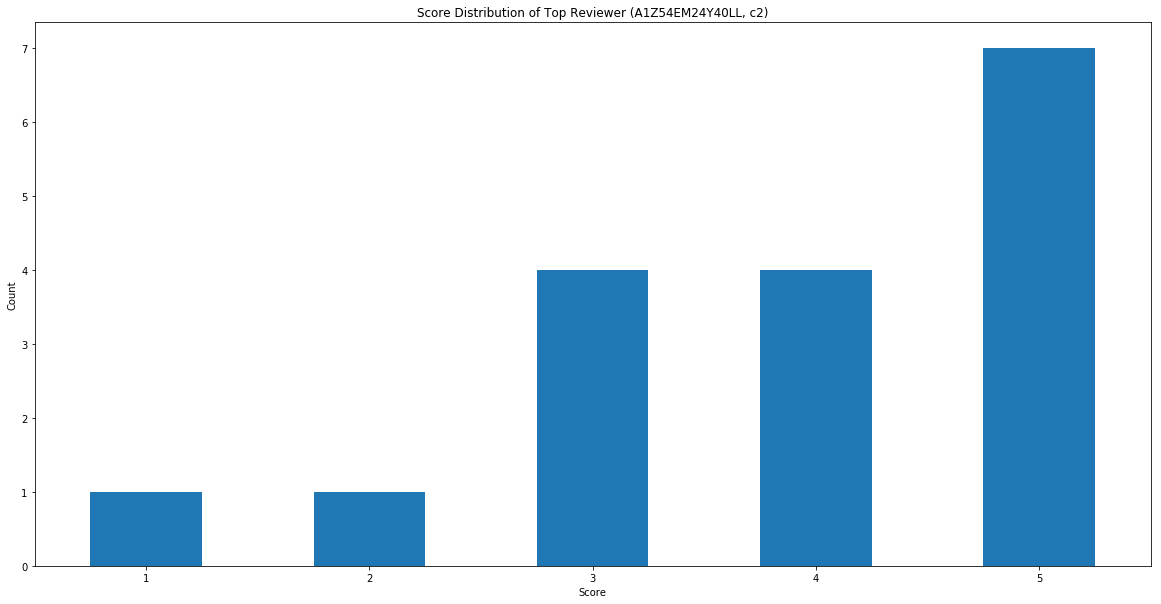

In [4]:
user_id, profile_name = top_reviewers.index.values[0]
cond = (reviews['UserId'] == user_id) & (reviews['ProfileName'] == profile_name)
col = 'Score'

ax = reviews.loc[cond, col].value_counts().sort_index().plot.bar(figsize=figsize)
ax.set_xlabel('Score')
ax.set_ylabel('Count')
ax.set_title('Score Distribution of Top Reviewer ({}, {})'.format(user_id, profile_name))
plt.xticks(rotation='horizontal')
;

# 3. Plot pandas Series DataFrame (Time->Date)

''

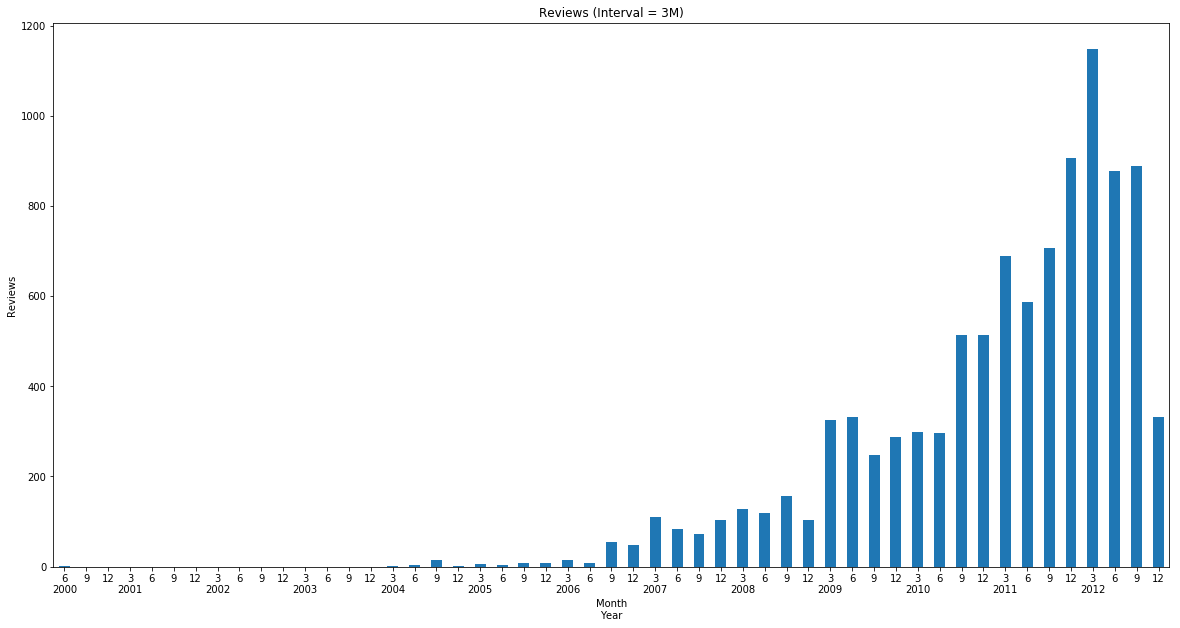

In [9]:
reviews['Date'] = pd.to_datetime(reviews['Time'], unit='s')

freq = '3M'

grouper = pd.Grouper(key='Date', freq=freq)
series = reviews.groupby(grouper).size().sort_index()

m_last = 13
xlabels = []
for y,m in np.array([x.split(' ') for x in series.index.strftime('%Y %#m')], dtype=int):
    xlabels.append(str(m)+'\n'+str(y) if m_last > m else str(m))
    m_last = m 

ax = series.plot.bar(figsize=figsize)
ax.set_title('Reviews (Interval = {})'.format(freq))
ax.set_xlabel('Month\nYear')
ax.set_ylabel('Reviews')
ax.set_xticklabels(xlabels)
plt.xticks(rotation='horizontal')
;

# 4. Plot HeatMap using seaborn

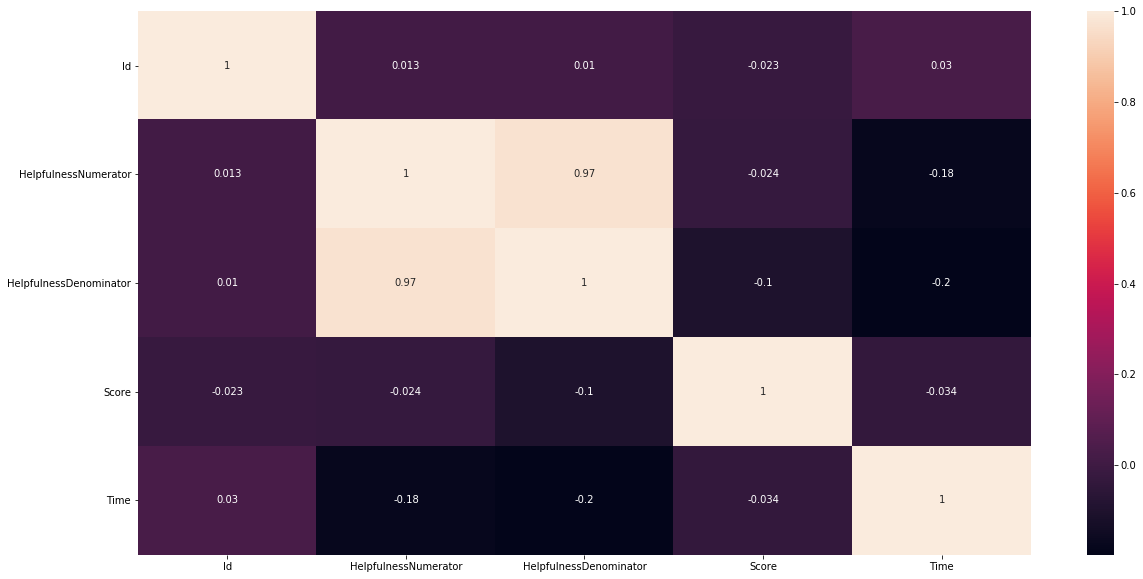

In [6]:
cols = ['Id', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time']
plt.figure(figsize=figsize)
sns.heatmap(reviews[cols].corr(), annot=True)

# 5. Helpful percent

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002473B032390>]],
      dtype=object)

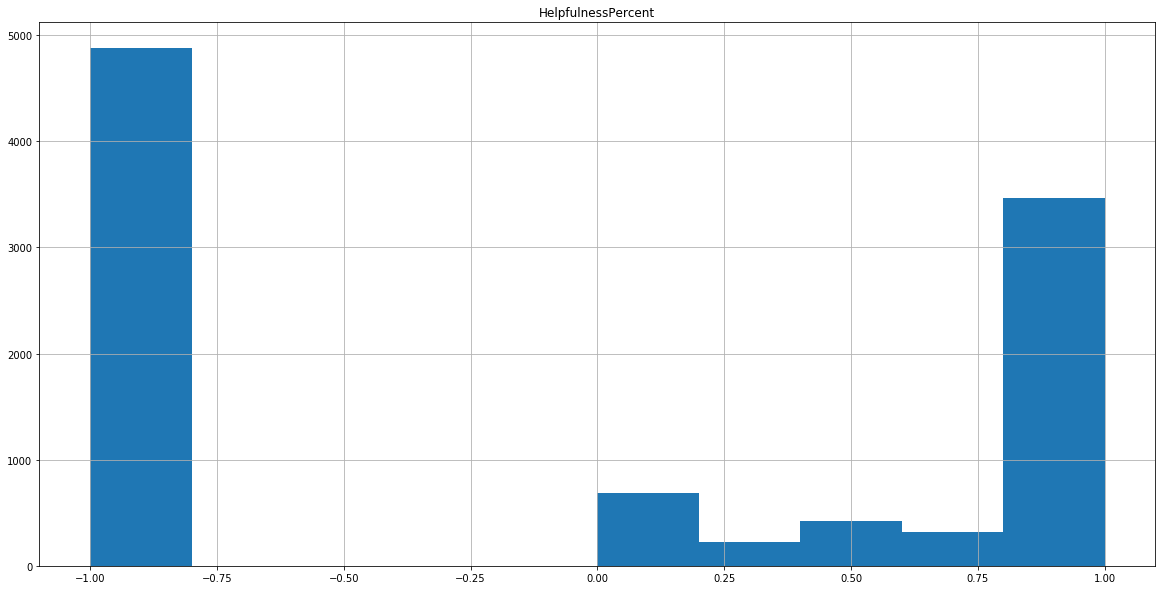

In [7]:
hn, hd, hp = 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'HelpfulnessPercent'

reviews[hp] = (reviews[hn] / reviews[hd])

invalid = (reviews[hn] > reviews[hd]) | (reviews[hd] == 0)
reviews.loc[invalid, hp] = -1

reviews.hist(column=hp, figsize=figsize)